<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks/blob/main/Onri's_Hilbert_Curve_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy-hilbert-curve

  Preparing metadata (setup.py) ... done
  Created wheel for numpy-hilbert-curve: filename=numpy_hilbert_curve-1.0.1-py3-none-any.whl size=6938 sha256=d3f5caadbf5eb1e5548efa65380047bd9a3380013821614af9f9963360d75e56
  Stored in directory: /root/.cache/pip/wheels/25/bc/96/2f9acf95bcd2ff7f2a68eae0067ecef5c29a64cb9e44e30208
Successfully built numpy-hilbert-curve


In [2]:
import numpy as np
from hilbert import decode, encode

In [3]:
import matplotlib.pyplot as plt
import matplotlib

In [4]:
# Turn an ndarray of Hilber integers into locations.
# 2 is the number of dimensions, 3 is the number of bits per dimension
locs = decode(np.array([1,2,3]), 2, 3)

print(locs)
# prints [[0 1]
#         [1 1]
#         [1 0]]

# You can go the other way also, of course.
H = encode(locs, 2, 3)

print(H)
# prints array([1, 2, 3], dtype=uint64)

[[0 1]
 [1 1]
 [1 0]]
[1 2 3]


<ipython-input-6-2ee4f73a70d6>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('copper')


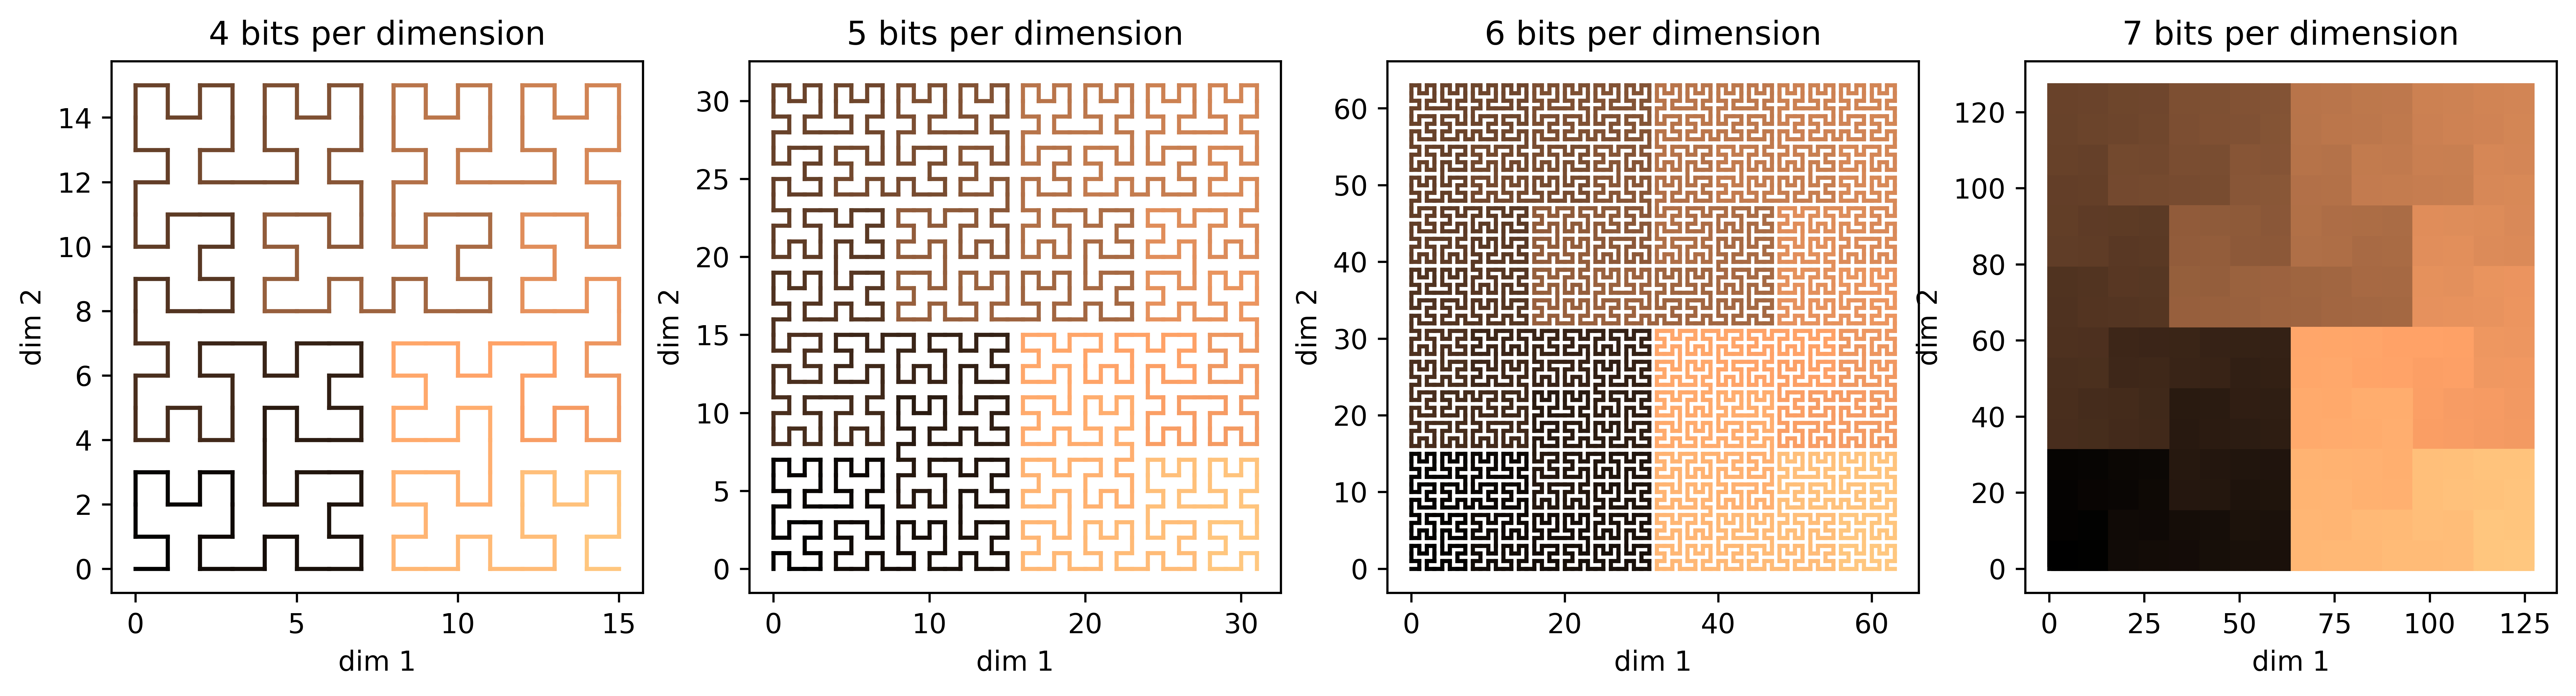

In [6]:
num_dims = 2

def draw_curve(ax, num_bits):

  # The maximum Hilbert integer.
  max_h = 2**(num_bits*num_dims)

  # Generate a sequence of Hilbert integers.
  hilberts = np.arange(max_h)

  # Compute the 2-dimensional locations.
  locs = decode(hilberts, num_dims, num_bits)

  # Color options.
  cmap = matplotlib.cm.get_cmap('copper')

  # Draw. This may be a little slow.
  for ii in range(max_h-1):
    ax.plot([locs[ii,0], locs[ii+1,0]],
            [locs[ii,1], locs[ii+1,1]],
            '-', color=cmap(ii/max_h))
  ax.set_aspect('equal')
  ax.set_title('%d bits per dimension' % (num_bits))
  ax.set_xlabel('dim 1')
  ax.set_ylabel('dim 2')


fig = plt.figure(figsize=(16,4), dpi=600)
for ii, num_bits in enumerate([4, 5, 6, 7]):
  ax = fig.add_subplot(1,4,ii+1)
  draw_curve(ax, num_bits)
plt.savefig('example_2d_color.png', bbox_inches='tight')

<ipython-input-10-8702e55331c1>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('copper')


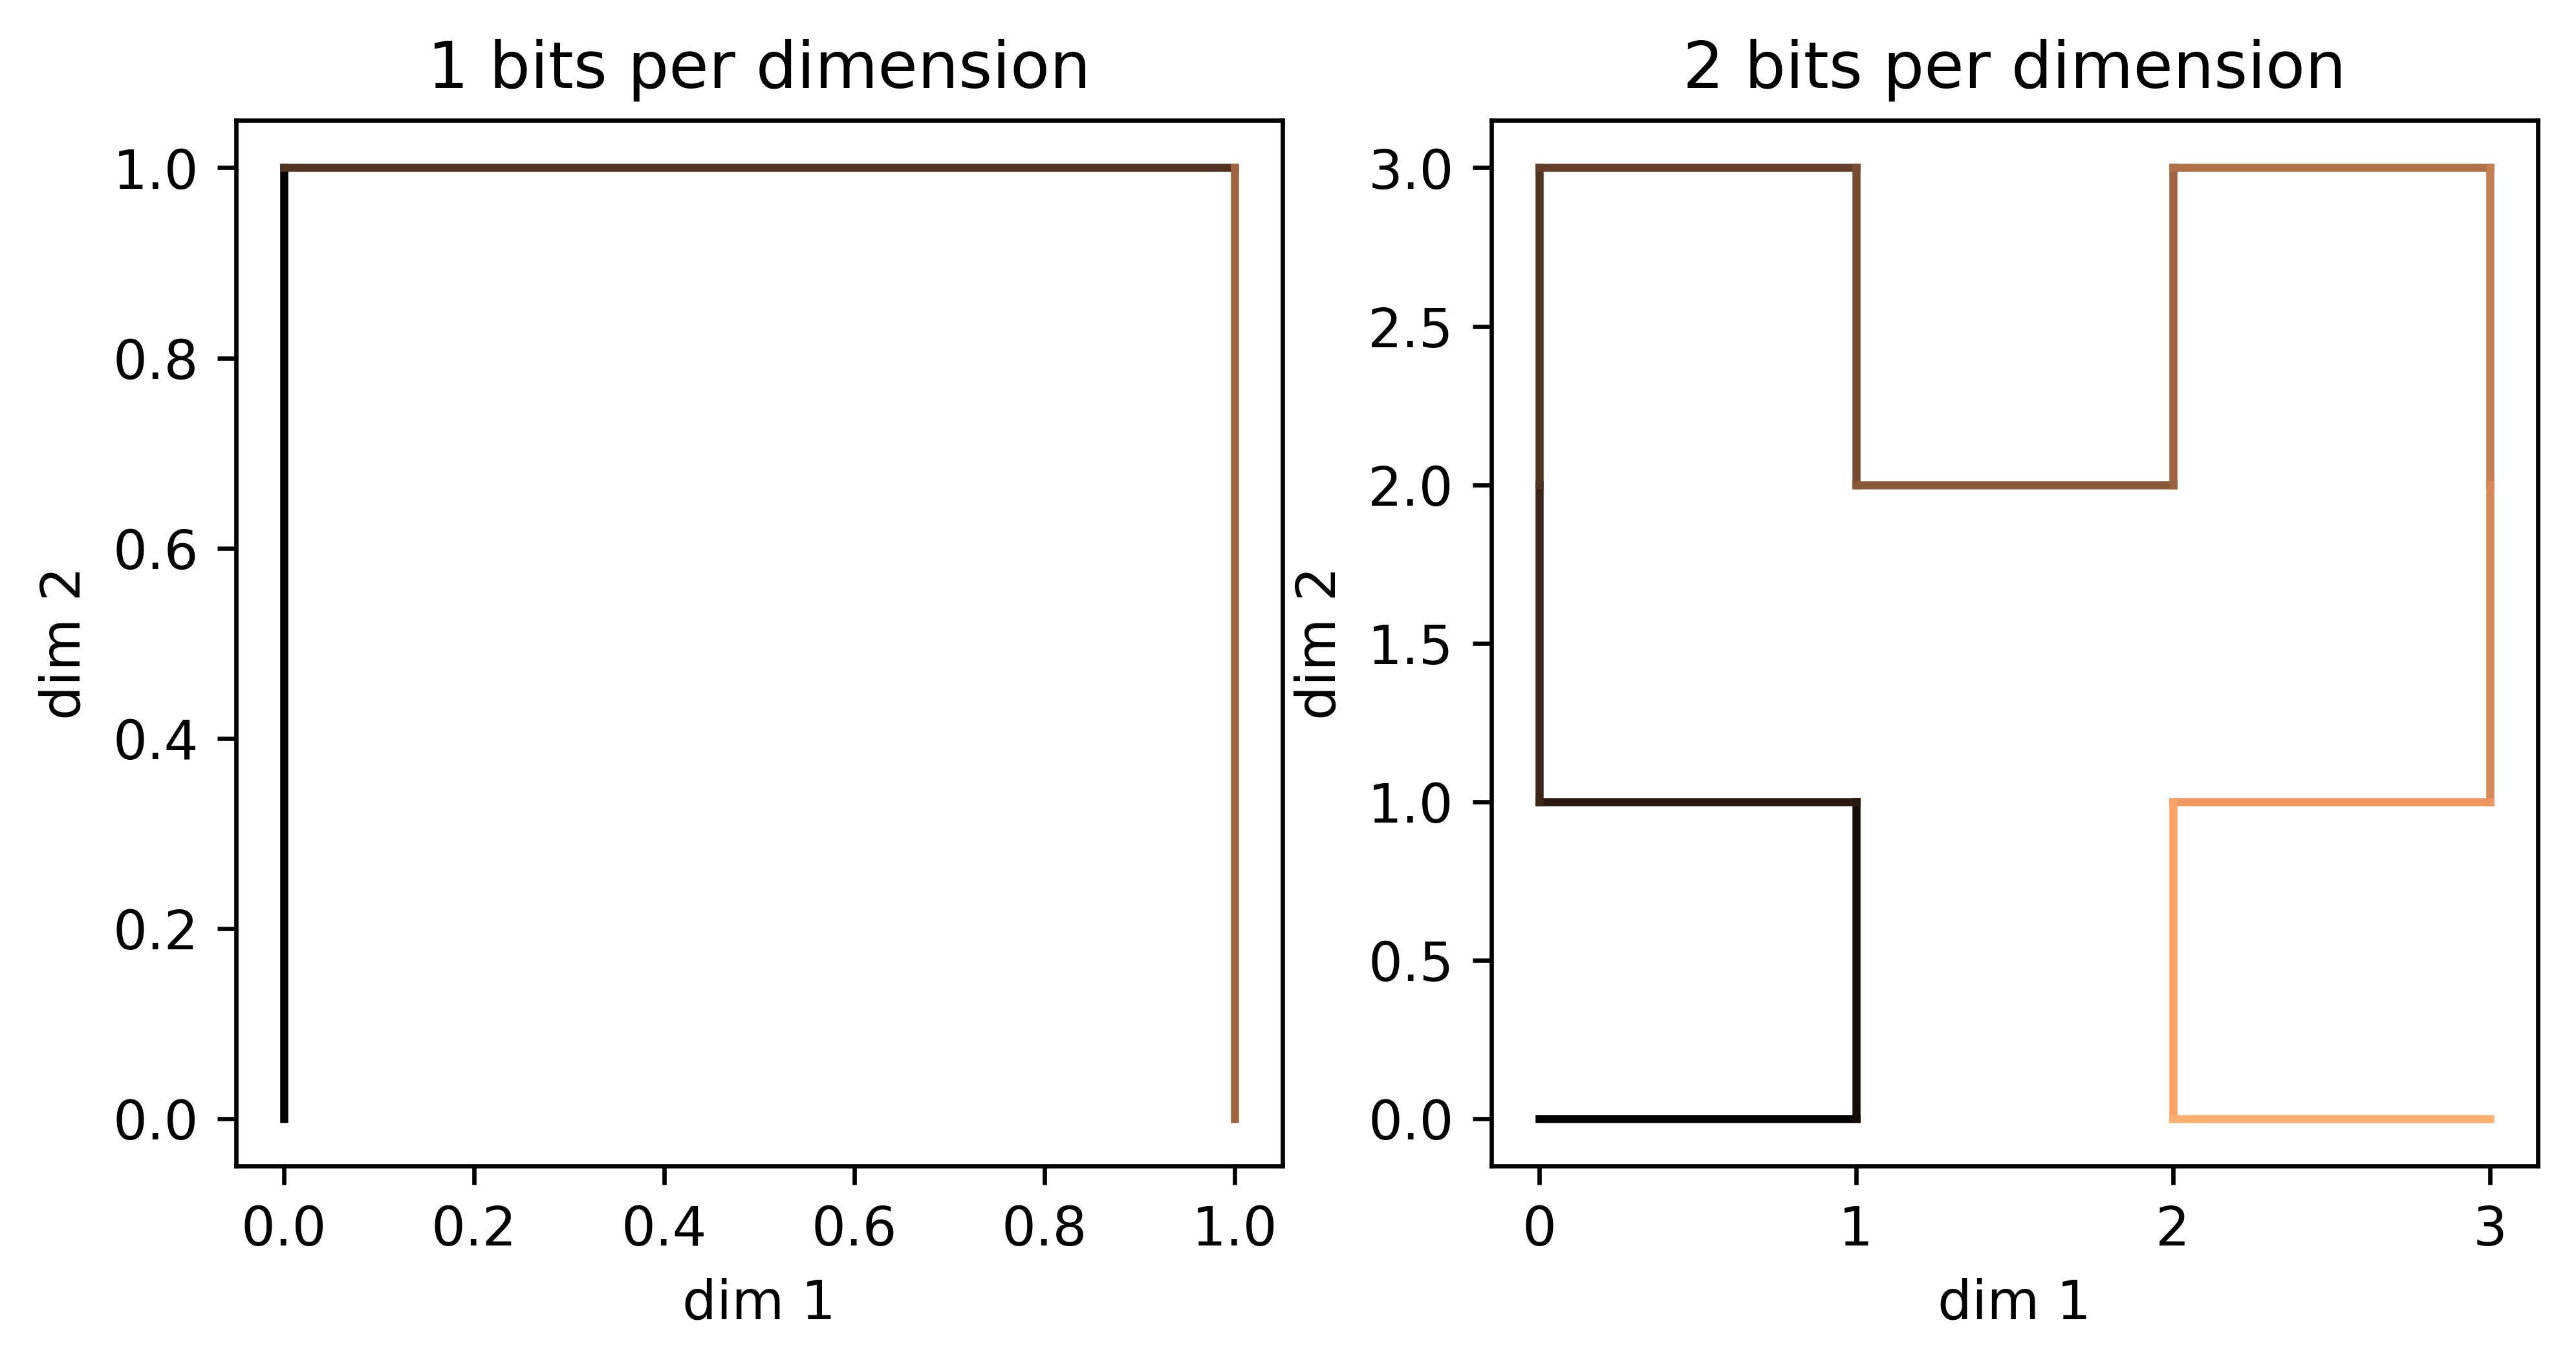

In [10]:
num_dims = 2

def draw_curve(ax, num_bits):

  # The maximum Hilbert integer.
  max_h = 2**(num_bits*num_dims)

  # Generate a sequence of Hilbert integers.
  hilberts = np.arange(max_h)

  # Compute the 2-dimensional locations.
  locs = decode(hilberts, num_dims, num_bits)

  # Color options.
  cmap = matplotlib.cm.get_cmap('copper')

  # Draw. This may be a little slow.
  for ii in range(max_h-1):
    ax.plot([locs[ii,0], locs[ii+1,0]],
            [locs[ii,1], locs[ii+1,1]],
            '-', color=cmap(ii/max_h))
  ax.set_aspect('equal')
  ax.set_title('%d bits per dimension' % (num_bits))
  ax.set_xlabel('dim 1')
  ax.set_ylabel('dim 2')


fig = plt.figure(figsize=(16,4), dpi=600)
for ii, num_bits in enumerate([1, 2]):
  ax = fig.add_subplot(1,4,ii+1)
  draw_curve(ax, num_bits)
plt.savefig('example_2d_color.png', bbox_inches='tight')

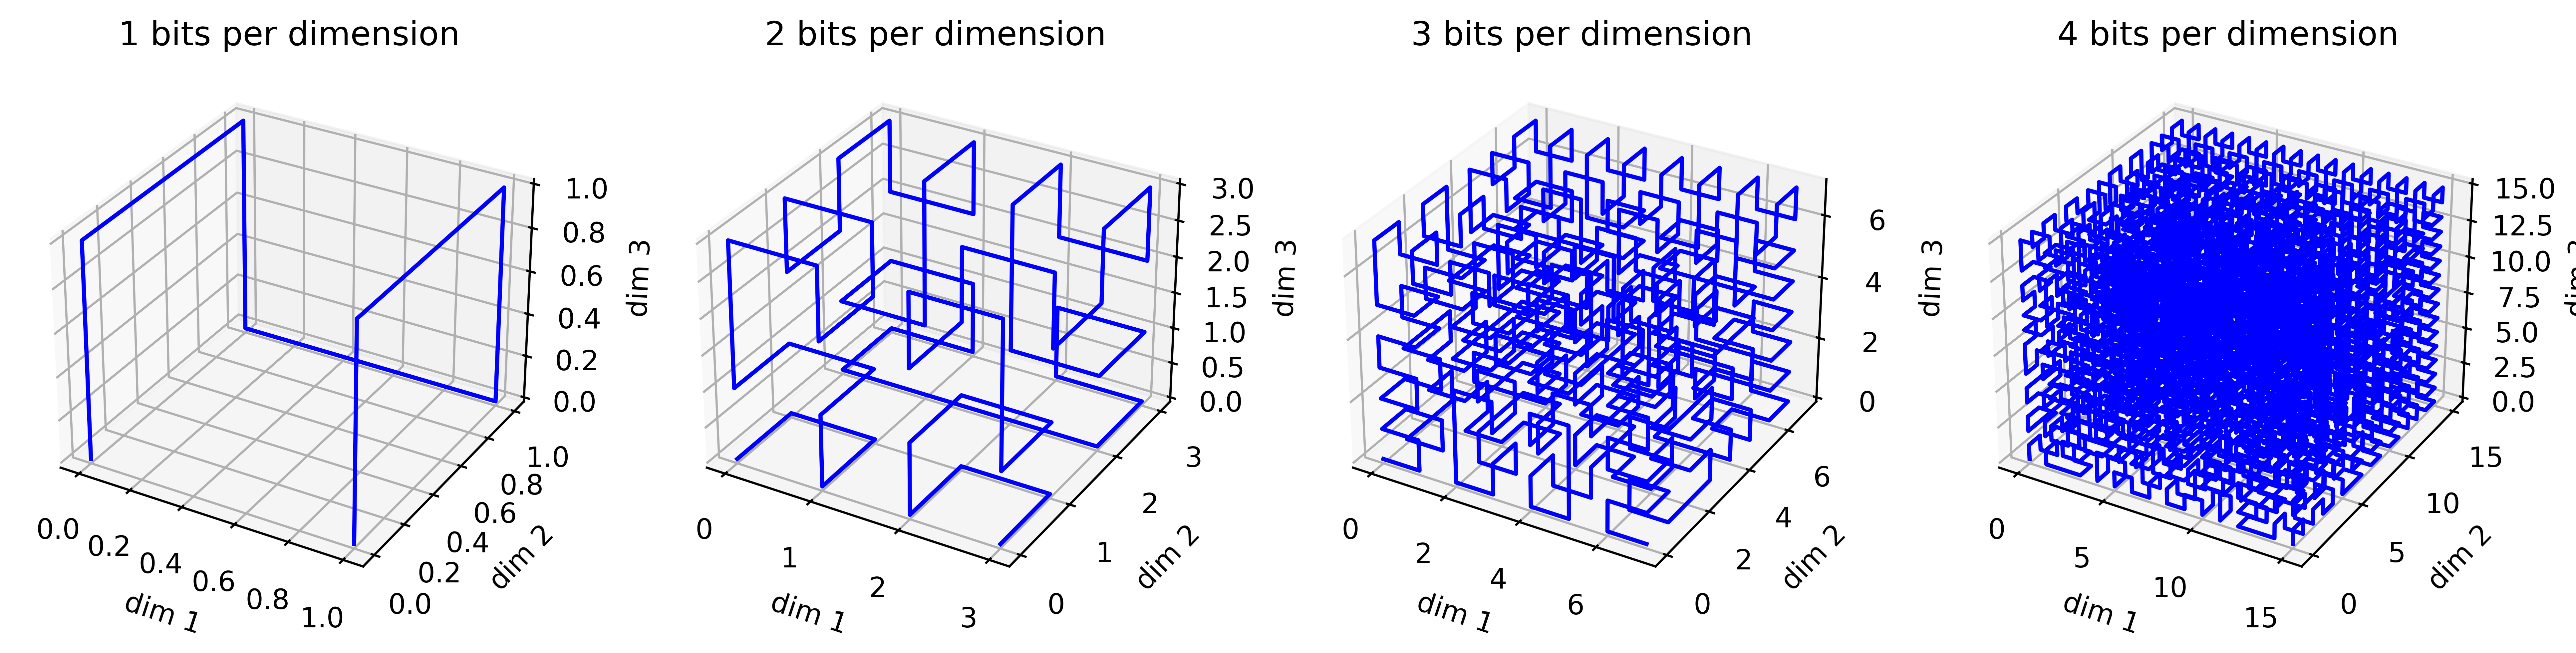

In [18]:
from mpl_toolkits.mplot3d import Axes3D

from hilbert import decode

num_dims = 3

def draw_curve(ax, num_bits):

  # The maximum Hilbert integer.
  max_h = 2**(num_bits*num_dims)

  # Generate a sequence of Hilbert integers.
  hilberts = np.arange(max_h)

  # Compute the 2-dimensional locations.
  locs = decode(hilberts, num_dims, num_bits)

  # Draw
  ax.plot(locs[:,0], locs[:,1], locs[:,2], '-', color = 'blue')
  # ax.set_aspect('equal')
  ax.set_title('%d bits per dimension' % (num_bits))
  ax.set_xlabel('dim 1')
  ax.set_ylabel('dim 2')
  ax.set_zlabel('dim 3')


fig = plt.figure(figsize=(16,4), dpi=600)
for ii, num_bits in enumerate([1, 2, 3, 4]):
  ax = fig.add_subplot(1,4,ii+1, projection='3d')
  draw_curve(ax, num_bits)
plt.savefig('example_3d.png', bbox_inches='tight')

In [ ]:
import matplotlib.animation as anim
import matplotlib

from mpl_toolkits.mplot3d import Axes3D

from hilbert import decode

num_bits = 5
num_dims = 3

# The maximum Hilbert integer.
max_h = 2**(num_bits*num_dims)

# Generate a sequence of Hilbert integers.
hilberts = np.arange(max_h)

# Compute the 3-dimensional locations.
locs = decode(hilberts, num_dims, num_bits)

# Draw
fig = plt.figure(figsize=(6,6), dpi=600)
ax = fig.add_subplot(111, projection='3d')

# Choose pretty colors.
cmap = matplotlib.cm.get_cmap('copper')

# Draw. This may be a little slow.
for ii in range(max_h-1):
  print(ii, max_h)
  ax.plot([locs[ii,0], locs[ii+1,0]],
          [locs[ii,1], locs[ii+1,1]],
          [locs[ii,2], locs[ii+1,2]],
          '-', color=cmap(ii/max_h))

# ax.set_aspect('equal')
ax.set_title('%d bits per dimension' % (num_bits))
ax.set_xlabel('dim 1')
ax.set_ylabel('dim 2')
ax.set_zlabel('dim 3')

def rotate(angle):
  ax.view_init(azim=angle)

rot_anim = anim.FuncAnimation(fig,
                              rotate,
                              frames=np.arange(0, 362, 2),
                              interval=100)

rot_anim.save('rotate_3d.gif') #, dpi=600, writer='imagemagick')

<ipython-input-26-2c1fea69cbb3>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('copper')


Streaming output truncated to the last 5000 lines.
22764 32768
22765 32768
22766 32768
22767 32768
22768 32768
22769 32768
22770 32768
22771 32768
22772 32768
22773 32768
22774 32768
22775 32768
22776 32768
22777 32768
22778 32768
22779 32768
22780 32768
22781 32768
22782 32768
22783 32768
22784 32768
22785 32768
22786 32768
22787 32768
22788 32768
22789 32768
22790 32768
22791 32768
22792 32768
22793 32768
22794 32768
22795 32768
22796 32768
22797 32768
22798 32768
22799 32768
22800 32768
22801 32768
22802 32768
22803 32768
22804 32768
22805 32768
22806 32768
22807 32768
22808 32768
22809 32768
22810 32768
22811 32768
22812 32768
22813 32768
22814 32768
22815 32768
22816 32768
22817 32768
22818 32768
22819 32768
22820 32768
22821 32768
22822 32768
22823 32768
22824 32768
22825 32768
22826 32768
22827 32768
22828 32768
22829 32768
22830 32768
22831 32768
22832 32768
22833 32768
22834 32768
22835 32768
22836 32768
22837 32768
22838 32768
22839 32768
22840 32768
22841 32768
22842 32768
2